In [2]:
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from scipy import interpolate as it
raman = "raman.txt"

In [4]:
wavenum, intensity = [],[]
with open(raman, 'r') as f:
    lines = f.readlines()
    for data in lines:
        value = [float(s) for s in data.split()]
        wavenum.append(value[0])
        intensity.append(value[1])


(750.42657, 1250.886, 2975.9155, 2884.5649, 1031.9596, 1427.287, 1145.3602, 1346.5677)
(15275.059, 5203.3115, 4767.228, 3785.1372, 3351.595, 3219.4121, 2840.8713, 1943.8367)


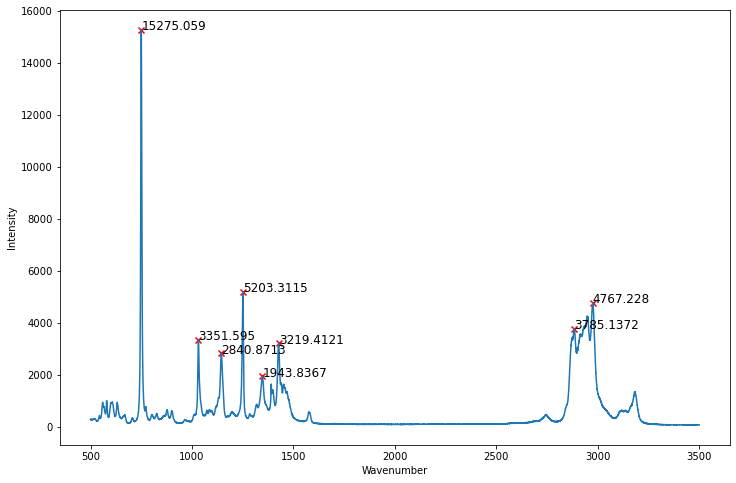

In [5]:
peaks, _ = scipy.signal.find_peaks(intensity, height = 1000, distance = 200)
peaks_wav = [wavenum[i] for i in peaks]
peaks_intensity = [intensity[i] for i in peaks]
Z = zip(peaks_wav, peaks_intensity)
Z = sorted(Z, key = lambda x: x[1], reverse = True)
peaks_wav, peaks_intensity = zip(*Z)
# Peak definition: 
#     peaks' intensity height > 1000, distance between 2 peaks more than 200 samples
print(peaks_wav[0:8])
print(peaks_intensity[0:8])
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(wavenum, intensity)
plt.scatter(peaks_wav[0:8], peaks_intensity[0:8], marker = "x", color = "red")
for i in range(8):
    ax.text(peaks_wav[i],peaks_intensity[i], peaks_intensity[i], size=12)
plt.xlabel("Wavenumber")
plt.ylabel("Intensity")
plt.show()

(0.0, 4351.594999999999)

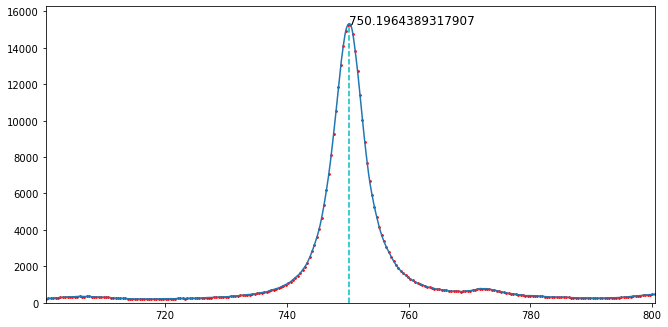

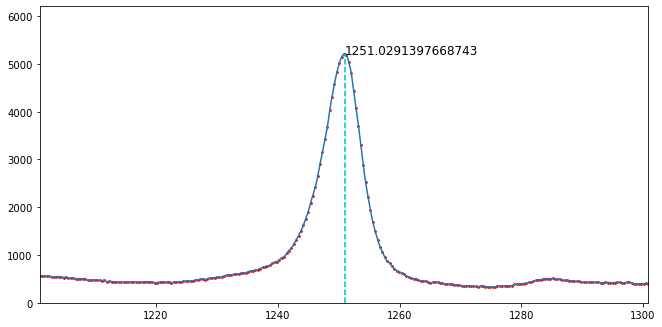

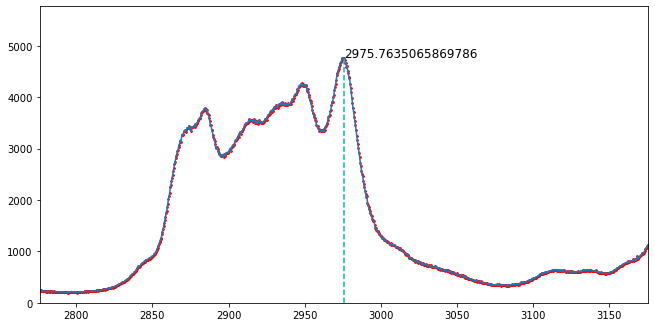

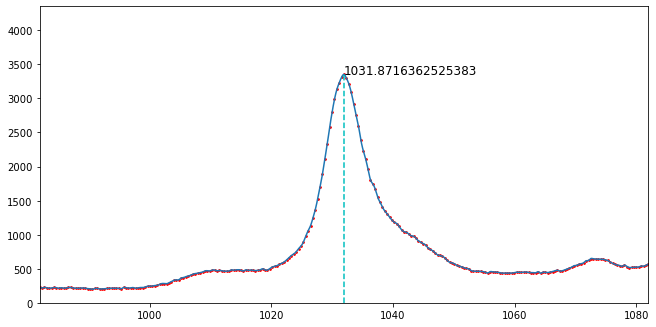

In [30]:
tck = it.splrep(wavenum, intensity, s=0)
xfit = np.arange(500, 3500, np.pi/50)
yfit = it.splev(xfit, tck, der=0)

deriv = it.splev(xfit, tck, der = 1)

zero_cross = []
for i in range(len(deriv) - 1):
    if deriv[i] * deriv[i+1] < 0 and yfit[i] > 1000:
        if xfit[i] > 740 and xfit[i] < 760:
            zero_cross.append(i)
        elif xfit[i] > 1240 and xfit[i] < 1260:
            zero_cross.append(i)
        elif xfit[i] > 2950 and xfit[i] < 3000 and yfit[i] > 4600:
            zero_cross.append(i)
        elif xfit[i] > 1020 and xfit[i] < 1040:
            zero_cross.append(i)

fig = plt.figure(figsize = (24,12))
ax1 = fig.add_subplot(221)
ax1.scatter(wavenum, intensity, s = 3,color = 'red')
ax1.plot(xfit, yfit)
ax1.vlines(xfit[zero_cross[0]], 0, peaks_intensity[0], colors = "c", linestyles = "dashed")
ax1.text(xfit[zero_cross[0]], yfit[zero_cross[0]], xfit[zero_cross[0]], size=12)
ax1.set_xlim(peaks_wav[0] - 50, peaks_wav[0] + 50)
ax1.set_ylim(0, peaks_intensity[0] + 1000)

fig = plt.figure(figsize = (24,12))
ax2 = fig.add_subplot(222)
ax2.scatter(wavenum, intensity, s = 3,color = 'red')
ax2.plot(xfit, yfit)
ax2.vlines(xfit[zero_cross[2]], 0, peaks_intensity[1], colors = "c", linestyles = "dashed")
ax2.text(xfit[zero_cross[2]], yfit[zero_cross[2]], xfit[zero_cross[2]], size=12)
ax2.set_xlim(peaks_wav[1] - 50, peaks_wav[1] + 50)
ax2.set_ylim(0, peaks_intensity[1] + 1000)

fig = plt.figure(figsize = (24,12))
ax3 = fig.add_subplot(223)
ax3.scatter(wavenum, intensity, s = 3,color = 'red')
ax3.plot(xfit, yfit)
ax3.vlines(xfit[zero_cross[5]], 0, peaks_intensity[2], colors = "c", linestyles = "dashed")
ax3.text(xfit[zero_cross[5]], yfit[zero_cross[5]], xfit[zero_cross[5]], size=12)
ax3.set_xlim(peaks_wav[2] - 200, peaks_wav[2] + 200)
ax3.set_ylim(0, peaks_intensity[2] + 1000)

fig = plt.figure(figsize = (24,12))
ax4 = fig.add_subplot(224)
ax4.scatter(wavenum, intensity, s = 3,color = 'red')
ax4.plot(xfit, yfit)
ax4.vlines(xfit[zero_cross[1]], 0, peaks_intensity[4], colors = "c", linestyles = "dashed")
ax4.text(xfit[zero_cross[1]], yfit[zero_cross[1]], xfit[zero_cross[1]], size=12)
ax4.set_xlim(peaks_wav[4] - 50, peaks_wav[4] + 50)
ax4.set_ylim(0, peaks_intensity[4] + 1000)

